<a href="https://colab.research.google.com/github/syedshahlal/Understanding_Computer_Vision/blob/main/CNN_and_Pooling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
path = '/content/car1.jpeg'

In [3]:
def read_img(path, grayscale=True):
  img = cv2.imread(path)
  if grayscale:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(img, cmap="gray")
    return img
  try:
    cv2.imshow("display", img) # This works on your local PC
    return img
  except Exception as e:
    print(e)
    from google.colab.patches import cv2_imshow # This is on your colab
    cv2_imshow(img)
    return img

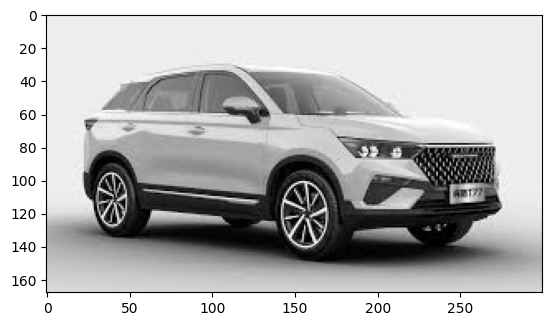

In [4]:
car=read_img(path, grayscale=True)

cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow



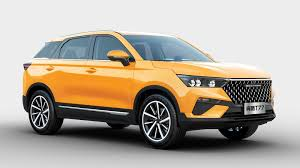

In [5]:
color_car=read_img(path, grayscale=False)


In [6]:
car.shape

(168, 300)

In [7]:
color_car.shape

(168, 300, 3)

In [8]:
row, col = car.shape
batch = 1 #single image is there
ch=1  #grayscale
reshaped_car_img = car.reshape(batch, row, col, ch)
reshaped_car_img.shape

(1, 168, 300, 1)

In [9]:
input_shape=reshaped_car_img.shape[1:]
CONV_LAYERS = [
    tf.keras.layers.Conv2D(filters=1, kernel_size=(3,3), strides=(1,1), input_shape=input_shape)
]

conv_model = tf.keras.Sequential(CONV_LAYERS)
conv_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 166, 298, 1)       10        
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
out=conv_model.predict(reshaped_car_img)

1/1 [==============================] - 1s 506ms/step


In [11]:
out.shape

(1, 166, 298, 1)

In [12]:
_, row, col,_ = out.shape

In [13]:
reshape_out = out.reshape(row,col)

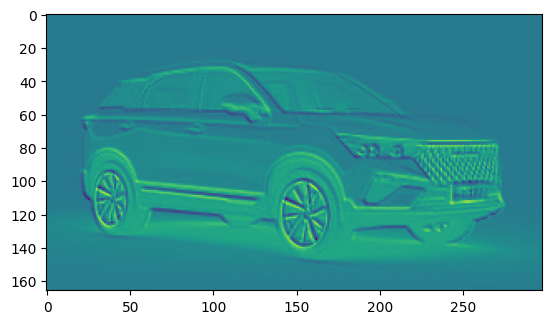

In [14]:
plt.imshow(reshape_out)

In [15]:
row, col, ch = color_car.shape
batch = 1
reshape_color_car = color_car.reshape(batch, row, col, ch)

In [16]:
reshape_color_car.shape

(1, 168, 300, 3)

In [17]:
input_shape=reshape_color_car.shape[1:]
CONV_LAYERS = [
    tf.keras.layers.Conv2D(filters=1, kernel_size=(3,3), strides=(1,1), input_shape=input_shape)
]

conv_model = tf.keras.Sequential(CONV_LAYERS)
conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
Total params: 28 (112.00 Byte)
Trainable params: 28 (112.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
_, row, col, _ = reshape_color_car.shape

In [20]:
reshape_color_car.shape

(1, 168, 300, 3)

In [22]:
out_color=conv_model.predict(reshape_color_car)

1/1 [==============================] - 0s 43ms/step


In [23]:
out_color.shape

(1, 166, 298, 1)

In [24]:
_, row, col,_ = out_color.shape

In [25]:
reshape_out_color = out_color.reshape(row,col)

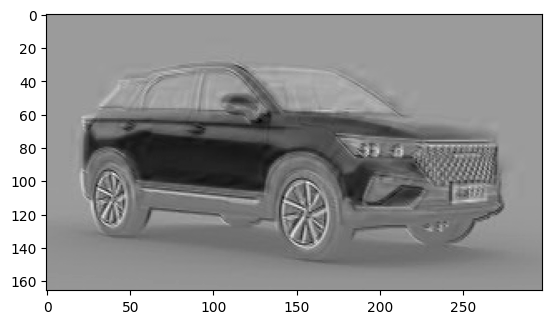

In [27]:
plt.imshow(reshape_out_color,cmap='gray')

In [28]:
def reshaping_in(img, grayscale=True):
  if grayscale:
    row, col = img.shape
    img = img.reshape(1, row, col, 1) # grayscale
    return img
  # else:
  row, col, ch = img.shape
  color_img = img.reshape(1, row, col, ch)
  return color_img

In [29]:
def get_conv_model(filters=1, kernel_size=(3,3), strides=(1,1), input_shape=None, padding="valid"):

  CONV_LAYER = [

      tf.keras.layers.Conv2D(
          filters=filters,
          kernel_size=kernel_size,
          strides=strides,
          input_shape=input_shape)
  ]

  conv_model = tf.keras.Sequential(CONV_LAYER)
  conv_model.summary()
  return conv_model

In [30]:
def apply_conv_model_and_visualize(img, conv_model):
  try:
    out = conv_model.predict(img)
    print(out.shape)
    _, row, col, channels = out.shape
    reshape_out = out.reshape(row, col, channels)
    for channel in range(channels):
      plt.imshow(reshape_out[:,:,channel], cmap="gray")
      plt.show()
  except Exception as e:
    raise e

cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow



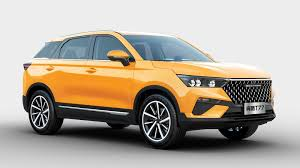

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
Total params: 28 (112.00 Byte)
Trainable params: 28 (112.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 82ms/step
(1, 166, 298, 1)


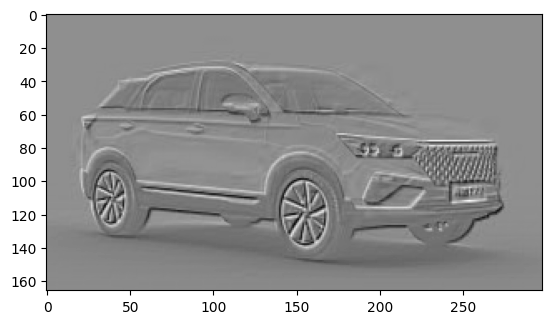

In [32]:
# With 1 filter
img = read_img(path, grayscale=False)
input_img = reshaping_in(img, grayscale=False)
model = get_conv_model(filters=1,
                       kernel_size=(3,3),
                       strides=(1,1),
                       input_shape=input_img.shape[1:],
                       padding="valid")

apply_conv_model_and_visualize(input_img, model)

cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow



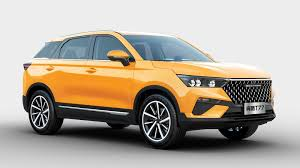

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 166, 298, 5)       140       
                                                                 
Total params: 140 (560.00 Byte)
Trainable params: 140 (560.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 155ms/step
(1, 166, 298, 5)


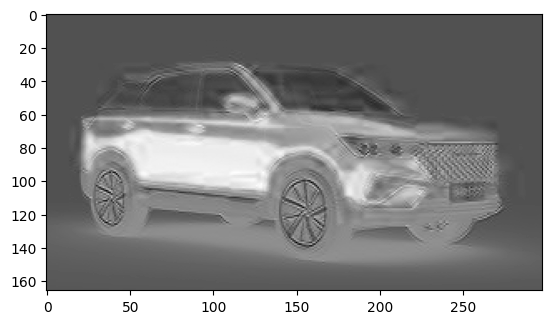

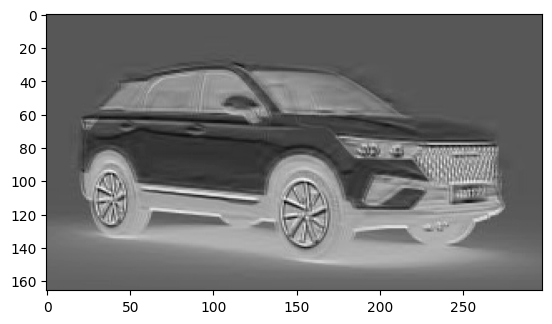

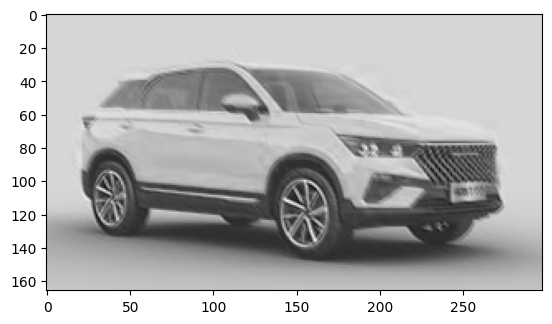

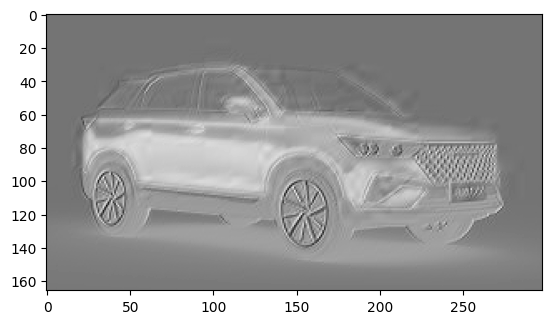

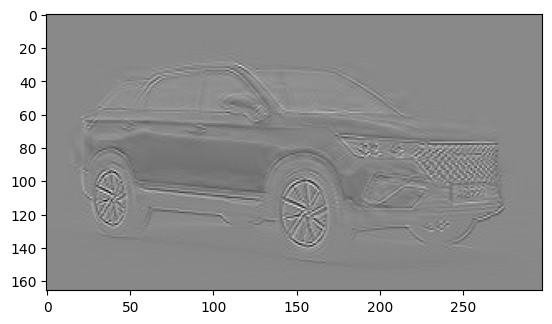

In [33]:
# With 5 filter
img = read_img(path, grayscale=False)
input_img = reshaping_in(img, grayscale=False)
model = get_conv_model(filters=5,
                       kernel_size=(3,3),
                       strides=(1,1),
                       input_shape=input_img.shape[1:],
                       padding="valid")

apply_conv_model_and_visualize(input_img, model)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 166, 298, 1)       10        
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1/1 [==============================] - 0s 101ms/step
(1, 166, 298, 1)


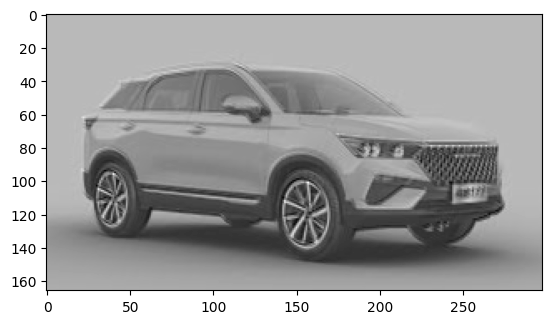

In [34]:
# With 1 filter for grayscale = True
img = read_img(path, grayscale=True)
input_img = reshaping_in(img, grayscale=True)
model = get_conv_model(filters=1,
                       kernel_size=(3,3),
                       strides=(1,1),
                       input_shape=input_img.shape[1:],
                       padding="valid")

apply_conv_model_and_visualize(input_img, model)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 166, 298, 5)       50        
                                                                 
Total params: 50 (200.00 Byte)
Trainable params: 50 (200.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1/1 [==============================] - 0s 131ms/step
(1, 166, 298, 5)


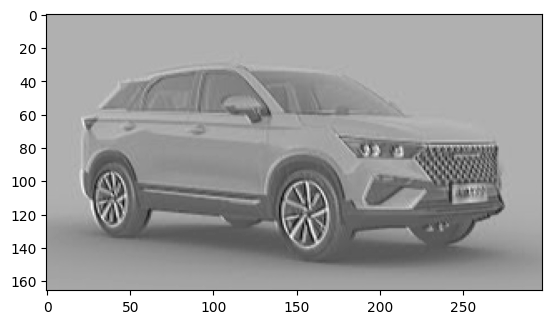

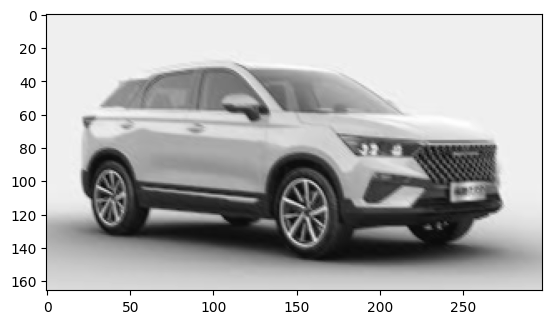

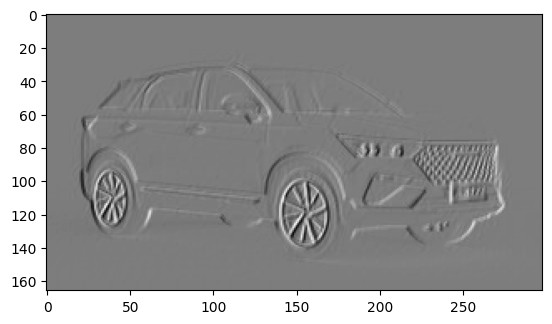

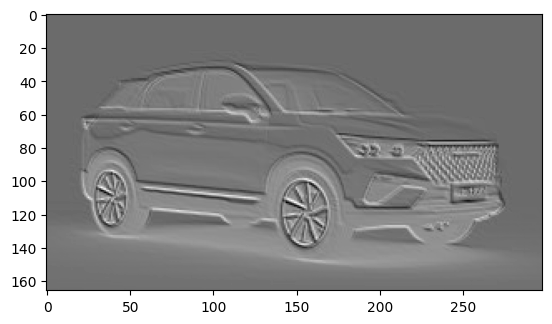

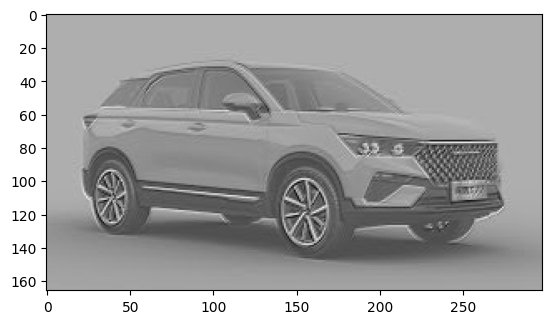

In [35]:
# With 5 filter for grayscale = True
img = read_img(path, grayscale=True)
input_img = reshaping_in(img, grayscale=True)
model = get_conv_model(filters=5,
                       kernel_size=(3,3),
                       strides=(1,1),
                       input_shape=input_img.shape[1:],
                       padding="valid")

apply_conv_model_and_visualize(input_img, model)